In [166]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
import time

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# import seaborn as sns
# sns.set()


# Ignore useless warnings (see SciPy issue #5998)
# import warnings
# warnings.filterwarnings(action="ignore", message="^internal gelsd")

from sklearn import datasets
from sklearn.decomposition import PCA

In [147]:
iris = datasets.load_iris(as_frame=True)
X = iris.data.values
y = iris.target.values

iris.frame.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


# PCA (Data Compression) [[3.1.]](#resources)

Certain type of unsupervised learning algorithm used for dimensionality reduction, in another hand we can say data compression.

## Table of content
1. [What PCA do](what-pca-do)
2. [Motivation](#motivation)
3. [PCA Algorithm](#pca-algorithm)
4. []()

## What PCA do ?

let say we have a dataset ${ x^{(1)}, x^{(2)}, ... x^{(m)} }$, where $x^{(i)} \in R^n$ as result of applying dimensionality reduction to the dataset we get a lower dimensional dataset ${z^{(1)}, z^{(2)}, ..., z^{(m)}}$, where $z^{(i)} \in R^k$ and the $k \leq n$. 

1. $n$ the old dimension, could be 2, 3, ... big number.
2. $k$ the new dimension, could be 1, 2, 3, 4, ..., depend what user we want.
3. $x^{(i)}$ the orginal (old) value.
4. $z^{(i)}$ the new value, with new dimension.

> Keep in mind the new value which we get $z^{(i)}$ it's not the original one just new generated based on PCA methodology.

## Motivation

1. Dimension reduction to speed learning algorithm.
2. Visualize dataset which has dimensionality bigger than 3D.
3. Memory space reduction.

## PCA Algorithm


* Data processing 
1. Training set: $\{ x^{(1)}, x^{(2)}, ..., x^{(m)}\}$
2. preprocessing (feature scaling/mean normalization):

> $\mu_j = \frac{1}{m} \sum^{m}_{i=1} x^{(i)}_{j} $

then repleace each $x^{(i)}_{j} $ with $x_{j} - \mu_{j}$

* coveriance matrix

Reduce data from n-dim to k-dim, compute "coveriance matrix":

$\sum = \frac{1}{m} \sum^{n}_{i=1} (x^{(i)})(x^{(i)})^{T}$

in matlab `[U,S,V] = svd(Sigma)` (singular value decomposition.)

## SVD
<!--  https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html -->

In [43]:
# u, s, vh = np.linalg.svd()

a = np.random.randn(2, 3) + 1j * np.random.randn(2, 3)
a.shape

(2, 3)

In [36]:
u, s, vh = np.linalg.svd(a)
u   

array([[ 0.35641549+0.00000000e+00j,  0.93432756-1.29111344e-17j],
       [-0.12333661-9.26151218e-01j,  0.04704889+3.53296482e-01j]])

In [47]:
np.dot(u[:, :1].T, a).shape

(1, 3)

## random/raw/todo


1. Data Compression (ex. PCA) will allow us to make our learning algorithms run more quickly as well. And that is actually, perhaps, even the more interesting application of this data compression rather than reducing the memory or disk space requirement for storing the data.

## Summary
1. 
2. PCA need feature to be scaled to comparable range of values.
3. PCA try to find a lower dimensional surface onto which to project the data, by minimize this squared projection erro.
4. PCA try to minimize the square distance between each point and the location of where it gets projected.

In [3]:
a = np.array([1, 2, 3 , 4])
a

array([1, 2, 3, 4])

In [9]:
m_ = np.mean(a)
m_

2.5

In [10]:
mx = np.max(a)
mx

4

In [14]:
a2 = a - m_
a2

array([-1.5, -0.5,  0.5,  1.5])

In [15]:
np.mean(a2)

0.0

In [13]:
a2 = a2 / mx
a2

array([-0.375, -0.125,  0.125,  0.375])

In [48]:
np.mean(a2)

0.0

## Ex.1.

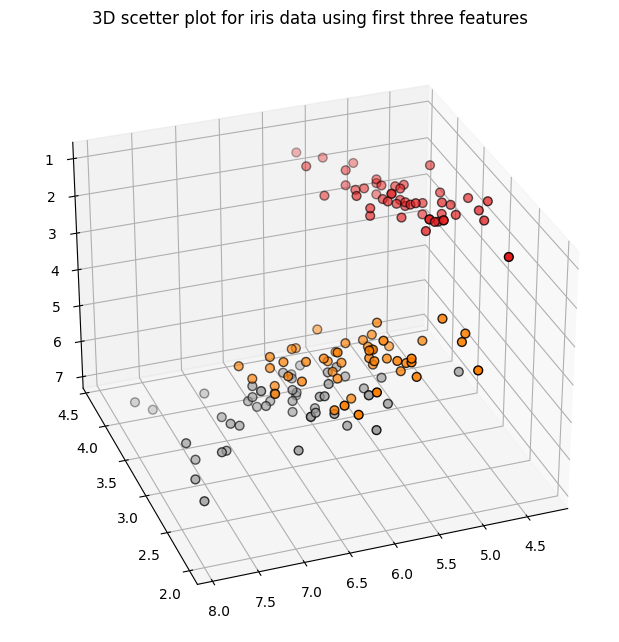

In [167]:
# ...
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = Axes3D(fig, elev=-150, azim=110)

# ...
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("3D scetter plot for iris data using first three features")

plt.show();

In [173]:
X_reduced_2d = PCA(n_components=2).fit_transform(X)
X_reduced_2d[:2]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123]])

In [174]:
X[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

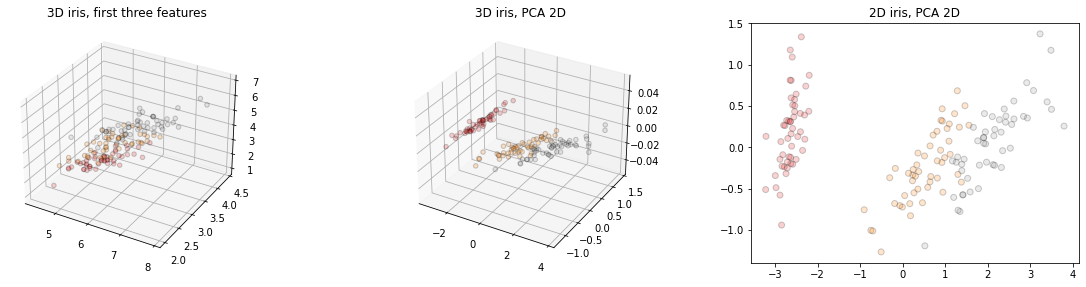

In [170]:
# import matplotlib.gridspec as gridspec
fig = plt.figure(figsize = (20,15))


# ...
ax1 = fig.add_subplot(3,3,1, projection='3d')
ax1.set_title("3D iris, first three features")
ax1.scatter(X[:, 0], X[:, 1],  X[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', alpha=.2)


ax2 = fig.add_subplot(3,3,2, projection='3d')
ax2.set_title("3D iris, PCA 2D")
ax2.scatter(X_reduced_2d[:, 0], X_reduced_2d[:, 1], zs=0, c=y, cmap=plt.cm.Set1, edgecolor='k', alpha=.2)


ax3 = fig.add_subplot(3,3,3)
ax3.set_title("2D iris, PCA 2D")
ax3.scatter(X_reduced_2d[:, 0], X_reduced_2d[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', alpha=.2)


plt.show();

## Resources

### Books
0. [[1.0.] ...](#)

### Papers
0. [[2.0.] ...](#)

### Web
0. [[3.0.] ...](#)
1. [[3.1.] Machine Learning > Week 8 > PCA](https://www.coursera.org/learn/machine-learning/lecture/GBFTt/principal-component-analysis-problem-formulation)

### Books
0. [[4.0.] ...](#)

### Images
0. [[5.0] ...](#)

### Const
1. [[6.0.] jupyter-notebook math symboles.](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html#The-Lorenz-Equations)

<!--
https://www.google.com/search?q=singular+value+decomposition.&source=lmns&bih=637&biw=1294&hl=en&sa=X&ved=2ahUKEwiiudj-o__qAhXFxCoKHcn9AnwQ_AUoAHoECAEQAA


-->